In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
plt.style.use('ggplot')

`References:`
<br><br>**Link1 (Recommended)**: https://www.youtube.com/watch?v=gl3lfL-g5mA
<br><br>Link2: https://www.youtube.com/watch?v=JXX5Ea0TXTM&list=PL_iWQOsE6TfVmKkQHucjPAoRtIJYt8a5A&index=16
<br><br>Link3: https://www.youtube.com/watch?v=Ixl3nykKG9M
<br><br>Link4: https://www.youtube.com/watch?v=S-LBjNVlMzw

### Scalar Notations

Mapping from $i^{th}$ neuron to $j^{th}$ neuron of $(l-1)^{th}$ and $l^{th}$ layers respectively, we have following equations
<br><br>$z_j^l = \displaystyle\sum_{i}w_{ij}^l \cdot a_i^{l-1} + b_j^l\\[1em]
a_j^l = \sigma(z_j^l)$
<br><br> For our last layer $L$,
<br><br>$C= \frac{1}{2}\displaystyle\sum_{i}(y_i^l-a_i^l)^2$
<br><br>$\frac {\partial C}{\partial z_j^L} = \delta_j^L$
<br><br>$\frac {\partial C}{\partial z_j^L} = \frac {\partial a_j^L}{\partial z_j^L}\cdot\frac {\partial C}{\partial a_j^L} = \sigma'(z_j^l)\cdot(a_j^L - y_j^L)$

### Equivalent Vector Notations

$z^l = (W^l)^Ta^{l-1}+b^l$
<br><br>$a^l = \sigma(z^l)$
<br><br>$\delta^l = W^{l+1}\delta^{l+1}\odot \sigma'(z_j^l)$
<br><br>$\frac {\partial C}{\partial W^l} = a^{l-1}(\delta^l)^T$
<br><br>$\frac {\partial C}{\partial b^l} = \delta^l\\[1em]$

### Coding it out

In [2]:
X, y = make_blobs(n_samples=20, centers=2,random_state=42)  

In [3]:
y.shape

(20,)

In [4]:
X_val, y_val = X[10:,:], y[10:]  
X,y = X[:10,:], y[:10]
X_norm = np.linalg.norm(X)
X = X / X_norm

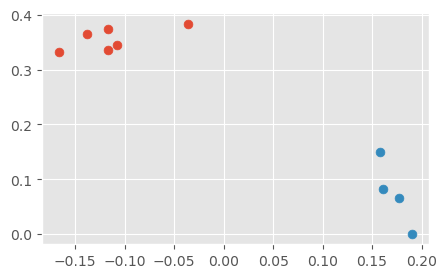

In [5]:
plt.figure(figsize=(5,3))
for i in range(4):
    plt.scatter(
        x= X[y == i, 0],
        y = X[y==i, 1],
        s=40
    )

In [6]:
df = pd.DataFrame(data={'x1':X[:,0],'x2':X[:,1],'y':y})
df

,x1,x2,y
0,-0.036452,0.383403,0
1,-0.165960,0.331284,0
2,-0.116752,0.374589,0
3,0.177331,0.065538,1
4,-0.116514,0.335068,0
5,0.190051,0.000529,1
6,0.158280,0.149942,1
7,-0.138049,0.365640,0
8,0.160527,0.081688,1
9,-0.107528,0.344146,0


In [7]:
num_samples = X.shape[0]                  # Batch of samples
in_features = X.shape[1]                            # number input of features
out_features = np.unique(y)                          # number of output features
print(f'Number of samples : {num_samples}')
print(f'Number of input features : {in_features}')
print(f'Number of output features : {out_features.shape[0]}')

Number of samples : 10
Number of input features : 2
Number of output features : 2


In [8]:
def one_hot_encoder(y):
    y_one_hot = np.zeros((y.size, y.max()+1), dtype=int)
    y_one_hot[np.arange(y.size),y] = 1
    return y_one_hot
y_one_hot = one_hot_encoder(y)

In [9]:
y_one_hot

array([[1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0]])

In [10]:
sigmoid = lambda x: 1 / (1 + np.exp(x))

In [11]:
def softmax(logits):
    exps = np.exp(logits - logits.max())
    return exps / np.sum(exps,axis=1).reshape(exps.shape[0],1)

In [12]:
def BCEloss(y_true,y_pred,eps=1e-6):
    return -(y_true * np.log(y_pred + eps) + (1-y_true) * np.log(1-y_pred + eps))

In [13]:
hidden_dim = 10

In [14]:
print('-'*10,'INPUT AND OUTPUT SIZES','-'*10)
print(f'\nInput : {X.shape}\nOutput: {y_one_hot.shape}')

---------- INPUT AND OUTPUT SIZES ----------

Input : (10, 2)
Output: (10, 2)


In [15]:
w1 = np.random.randn(num_samples,hidden_dim) * num_samples ** -0.5
b1 = np.zeros((hidden_dim,1))
w2 = np.random.randn(hidden_dim,num_samples) * hidden_dim ** -0.5
b2 = np.zeros((num_samples,1))
print('-'*10,'PARAMETER SIZES','-'*10)
print(f'\nLayer 1:\n\tWeight_1 : {w1.shape}\n\tBias_1:    {b1.shape}\nLayer 2:\n\tWeight_2: {w2.shape}\n\tBias_2:   {b2.shape}')

---------- PARAMETER SIZES ----------

Layer 1:
	Weight_1 : (10, 10)
	Bias_1:    (10, 1)
Layer 2:
	Weight_2: (10, 10)
	Bias_2:   (10, 1)


In [16]:
z1 =  w1.T @ X + b1
a1 = sigmoid(z1)
z2 = w2.T @ a1 + b2
a2 = sigmoid(z2)
print('-'*10,'HIDDEN STATE OUTPUT SIZES','-'*10)
print(f'\nLayer 1:\n\tLinear_1:     {z1.shape}\n\tActivation_1: {a1.shape}')
print(f'\nLayer 1:\n\tLinear_2:     {z2.shape}\n\tActivation_1: {a2.shape}')

---------- HIDDEN STATE OUTPUT SIZES ----------

Layer 1:
	Linear_1:     (10, 2)
	Activation_1: (10, 2)

Layer 1:
	Linear_2:     (10, 2)
	Activation_1: (10, 2)


In [17]:
loss = BCEloss(y_one_hot,a2)
print(f'Loss matrix size : {loss.shape}')
print(f'Averaged Binary Cross Entropy Loss: {loss.mean()}')

Loss matrix size : (10, 2)
Averaged Binary Cross Entropy Loss: 0.7409756386592015


##### Backpropogation

<h4>Gradient of Binary Cross Entropy with Sigmoid Activation (For Stability Reasons)</h4>

\begin{align}
L(u) &= -p \log(\sigma(u)) - (1-p)\log(1 - \sigma(u)) \\
&= -p\log( \frac{e^u}{1+e^u} ) - (1-p) \log( \frac{1}{1+e^u}) \\
&= -pu +\log(1 + e^u). \\
&L’(u) = \sigma(u) - p.
\end{align}


In [18]:
dz2 = a2 - y_one_hot
print(f'Gradient of Loss with respect to last activation (matrix) size : {dz2.shape}')

Gradient of Loss with respect to last activation (matrix) size : (10, 2)


In [19]:
dz2 = a2 - y_one_hot
dw2 = a1 @ dz2.T
db2 = np.sum(dz2, axis=1, keepdims=True)
da1 = sigmoid(z1) * (1-sigmoid(z1))
dz1 = w1 @ dz2 * da1
dw1 =  X @ dz1.T 
db1 = np.sum(dz1, axis=1, keepdims=True)
print(f'\nWeight 2 grad : {dw2.shape}\nBias 2 grad : {db2.shape} ')
print(f'\nWeight 1 grad : {dw2.shape}\nBias 1 grad : {db2.shape} ')


Weight 2 grad : (10, 10)
Bias 2 grad : (10, 1) 

Weight 1 grad : (10, 10)
Bias 1 grad : (10, 1) 


#### Training our network

`Note:` For some reason adding gradients in case of bias is leading to high validation errors, so size is changed from (num_samples X 1) to (num_samples X in_features)

In [20]:
w1 = np.random.randn(hidden_dim,num_samples) * hidden_dim ** -0.5
b1 = np.zeros((hidden_dim,in_features))
w2 = np.random.randn(num_samples,hidden_dim) * num_samples ** -0.5
b2 = np.zeros((num_samples,in_features))

epochs = 100
lr = 1
loss_log = []
val_log = []
for i in range(epochs):
    
    # Forward Pass
    z1 =  w1.T @ X + b1
    a1 = sigmoid(z1)
    z2 = w2.T @ a1 + b2
    a2 = sigmoid(z2)
    loss = BCEloss(y_one_hot,a2)
    
    # backward pass
    #da2 = (a2 - y_one_hot )/ (a2*(1-a2))
    #dz2 = da2 * a2 * (1-a2) 
    dz2= a2 - y_one_hot
    dw2 = a1 @ dz2.T
    #db2 = np.sum(dz2, axis=1, keepdims=True)
    db2 = dz2
    da1 = sigmoid(z1) * (1-sigmoid(z1))
    dz1 = w1 @ dz2 * da1
    dw1 =  X @ dz1.T 
    #db1 = np.sum(dz1, axis=1, keepdims=True)
    db1 = dz1

    # Gradient descent
    w1 += lr * dw1
    b1 += lr * db1
    w2 += lr * dw2
    b2 += lr * db2
    
    loss_log.append(loss.mean())
    
    # Validation
    z1 =  w1.T @ X_val + b1
    a1 = sigmoid(z1)
    z2 = w2.T @ a1 + b2
    a2 = sigmoid(z2)
    val_loss = BCEloss(y_one_hot,a2)
    val_log.append(val_loss.mean())
    if i % (epochs / 10)  == 0:
        print(f'Averaged BCE Train Loss: {loss.mean():.6f} | Averaged BCE Val Loss: {val_loss.mean():.6f}')

Averaged BCE Train Loss: 0.710932 | Averaged BCE Val Loss: 0.573737
Averaged BCE Train Loss: 0.061727 | Averaged BCE Val Loss: 0.220439
Averaged BCE Train Loss: 0.025412 | Averaged BCE Val Loss: 0.218035
Averaged BCE Train Loss: 0.015246 | Averaged BCE Val Loss: 0.226530
Averaged BCE Train Loss: 0.010678 | Averaged BCE Val Loss: 0.236003
Averaged BCE Train Loss: 0.008131 | Averaged BCE Val Loss: 0.245196
Averaged BCE Train Loss: 0.006523 | Averaged BCE Val Loss: 0.253890
Averaged BCE Train Loss: 0.005423 | Averaged BCE Val Loss: 0.262078
Averaged BCE Train Loss: 0.004626 | Averaged BCE Val Loss: 0.269795
Averaged BCE Train Loss: 0.004024 | Averaged BCE Val Loss: 0.277088


`Our model has likely overfit`

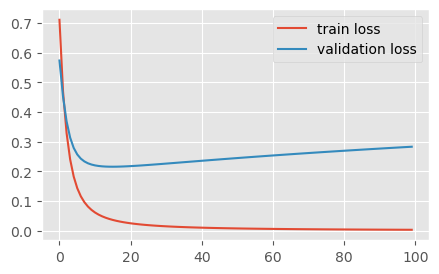

In [21]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(len(loss_log)),loss_log)
plt.plot(np.arange(len(val_log)),val_log)
plt.legend(['train loss','validation loss']);

**Overfitting is mainly due to out dataset being too small**